In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
fruits = pd.read_table('fruit_data_with_colors.txt')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [4]:
# create a mapping from fruit label value to fruit name to make results easier to interpret
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [5]:
X = fruits[['mass','width','height','color_score']]
y = fruits['fruit_label']

# by default test size = 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [6]:
print(X.shape)
print(X_train.shape)

(59, 4)
(44, 4)


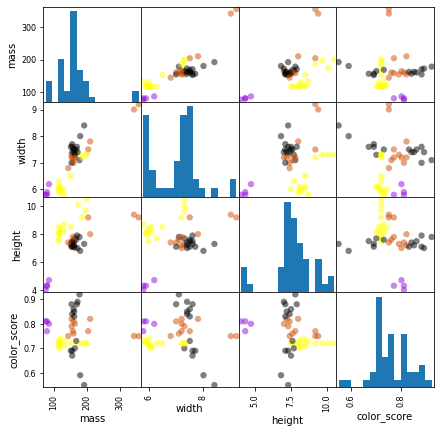

In [7]:
# Feature pair plot - shows interactions of features in pairs -> diff colors depict different classes
# Works when number of features < 20
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = scatter_matrix(X_train, c = y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(7,7), cmap=cmap)

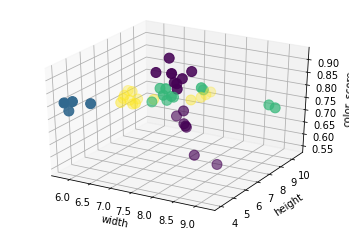

In [8]:
# plotting a 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_train['width'], X_train['height'], X_train['color_score'], c = y_train, marker = 'o', s=100)
ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('color_score')
plt.show()

In [9]:
# Create KNN Classifier object
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [10]:
# Euclidean distance is used by default i.e. Minkowski with p=2
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [11]:
knn.score(X_test, y_test)

0.53333333333333333

In [12]:
fruit_prediction = knn.predict([[20, 4.3, 5.5, 0.7]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

In [13]:
fruit_prediction = knn.predict([[100, 6.3, 8.5, 0.8]])
lookup_fruit_name[fruit_prediction[0]]

'lemon'

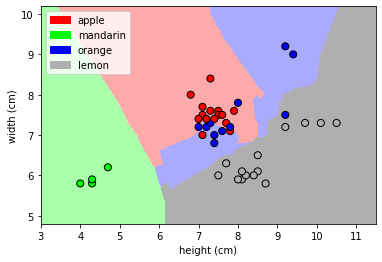

In [14]:
# Plotting decision boundaries
from adspy_shared_utilities import plot_fruit_knn

plot_fruit_knn(X_train, y_train, 5, 'uniform')   # we choose 5 nearest neighbors

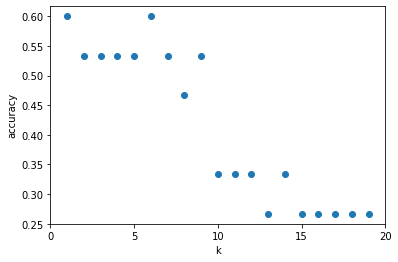

In [15]:
# Accuracy gets worse as we increase k more and more
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);